# Download counts for nteract

In [1]:
import IPython.display
import pandas as pd

In [2]:
import requests

# Note: 
data = requests.get('https://api.github.com/repos/nteract/nteract/releases').json()

In [3]:
print("{}:\n\t{}\n\t{}".format(
  data[0]['tag_name'],
  data[0]['assets'][0]['browser_download_url'],
  data[0]['assets'][0]['download_count']
))


v0.0.13:
	https://github.com/nteract/nteract/releases/download/v0.0.13/nteract-darwin-x64.zip
	77


The releases API only has context of the filename, so we'll convert:

```
https://github.com/nteract/nteract/releases/download/v0.0.13/nteract-darwin-x64.zip
```

to

```
darwin-x64
```

Which means we're reliant on our release naming to keep this a nice consistent structure

In [4]:
def strip_off_release(browser_download_url):
    filename = browser_download_url.split('/')[-1]
    basename = filename.split('.')[0]
    system = basename.split('-')[1:]
    return "-".join(system)

In [5]:
releases = [
  {
    'version': x['tag_name'], 
    'counts': { strip_off_release(y['browser_download_url']): y['download_count'] for y in x['assets'] }
  } 
    for x in data
]
releases

[{'counts': {'darwin-x64': 77, 'linux-x64': 100, 'win32-x64': 27},
  'version': 'v0.0.13'},
 {'counts': {'darwin-x64': 110}, 'version': 'v0.0.12'},
 {'counts': {'darwin-x64': 6}, 'version': 'v0.0.11'},
 {'counts': {'darwin-x64': 15, 'linux-x64': 11}, 'version': 'v0.0.10'},
 {'counts': {'darwin-x64': 10}, 'version': 'v0.0.9'},
 {'counts': {'darwin-x64': 20, 'linux-x64': 1}, 'version': 'v0.0.8'},
 {'counts': {'darwin-x64': 41}, 'version': 'v0.0.7'},
 {'counts': {'darwin-x64': 2}, 'version': 'v0.0.6'},
 {'counts': {'darwin-x64': 30}, 'version': 'v0.0.5'},
 {'counts': {'darwin-x64': 8}, 'version': 'v0.0.4'},
 {'counts': {'linux-ia32': 3, 'linux-x64': 18, 'os-x': 110},
  'version': 'v0.0.3'},
 {'counts': {'linux-ia32': 0, 'linux-x64': 0, 'os-x': 4}, 'version': 'v0.0.2'}]

In [6]:
versions = []
frames = []

for release in releases:
    versions.append(release['version'])
    frames.append(pd.DataFrame.from_dict(release['counts'], orient='index'))

df = pd.concat(frames, keys=versions).reset_index()
df.columns = ['version', 'os', 'count']
df

,version,os,count
0,v0.0.13,win32-x64,27
1,v0.0.13,linux-x64,100
2,v0.0.13,darwin-x64,77
3,v0.0.12,darwin-x64,110
4,v0.0.11,darwin-x64,6
5,v0.0.10,linux-x64,11
6,v0.0.10,darwin-x64,15
7,v0.0.9,darwin-x64,10
8,v0.0.8,linux-x64,1
9,v0.0.8,darwin-x64,20


It would be really interesting to know how these counts change over time.

In [7]:
from distutils.version import LooseVersion

versions = set(df.version.values.tolist())
versions = sorted(versions, key=LooseVersion)

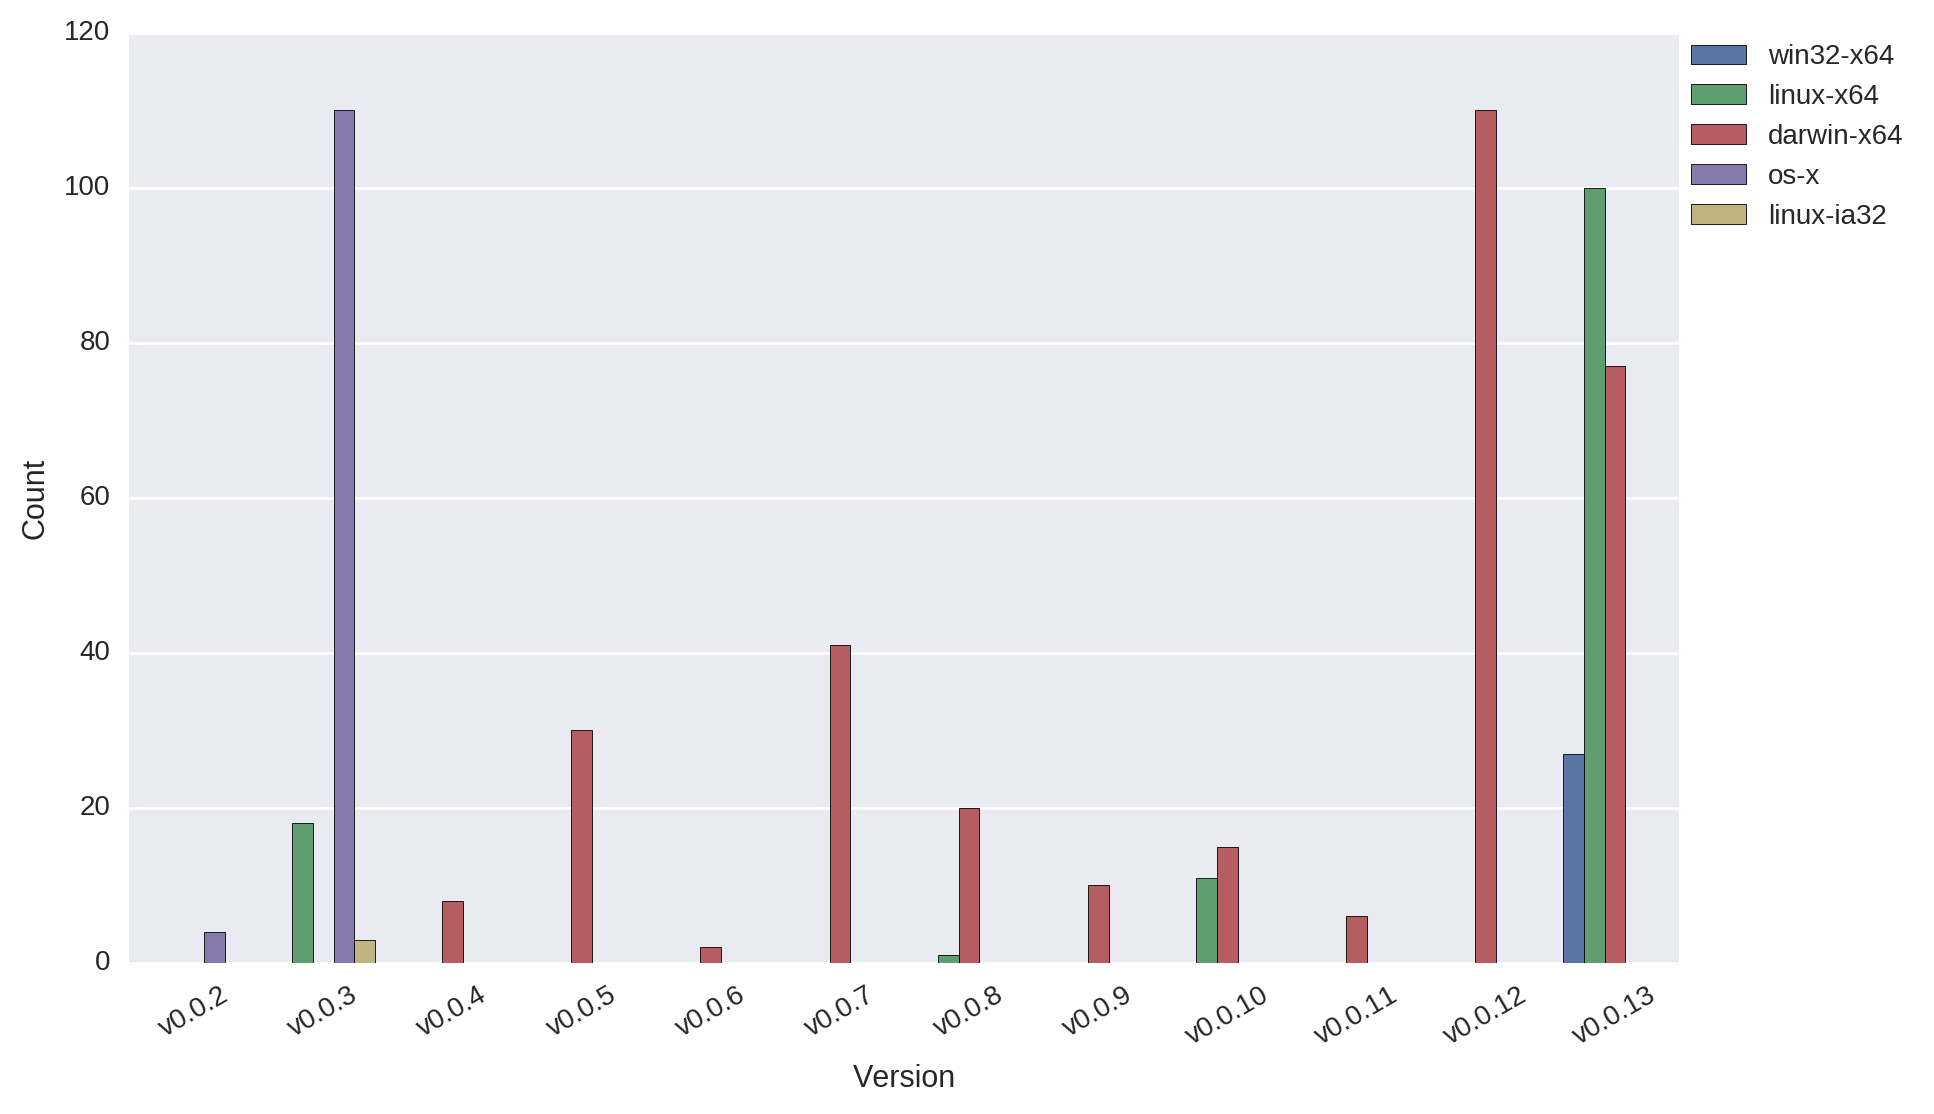

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(x='version', y="count", hue="os", data=df, order=versions)
ax.set_xticklabels(versions, rotation=30)
ax.set(xlabel='Version', ylabel='Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.show()